In [1]:
#importing required librabries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

# Phase 1: Data Exploration & Initial Assessment

### Step 1: Data Understanding

In [2]:
df=pd.read_csv("train.csv")

In [31]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


### Columns of the Dataset

In [37]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

### Structure of the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Checking Summary Status of Numerical Columns

In [5]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


### Checking Summary Status of Categorical Columns

In [6]:
df.describe(include='O')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [15]:
df.select_dtypes(include='O')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F
...,...,...,...,...
10994,A,Ship,medium,F
10995,B,Ship,medium,F
10996,C,Ship,low,F
10997,F,Ship,medium,M


In [20]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

### Checking Missing Values

In [7]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### Checking Duplicate Values

In [38]:
df.duplicated().sum()

np.int64(0)

### Checking Inconsistencies

In [13]:
df['Mode_of_Shipment'].value_counts()

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

In [14]:
df['Product_importance'].value_counts()

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
F    5545
M    5454
Name: count, dtype: int64

In [16]:
df['Warehouse_block'].value_counts()

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

In [17]:
df['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

In [4]:
df.shape

(10999, 12)

📊 __Dataset Overview__ \

__1️. What is the shape of the dataset (rows and columns)?__
Rows: 10,999
Columns: 12
This provides a sufficiently large dataset for meaningful EDA and business insights.

__2️. Which columns contain missing values?__
After checking missing values using: df.isnull().sum()

__Observation:__
No missing (null) values were found in the dataset.

__Conclusion:__
The dataset is complete and does not require imputation.
This improves reliability and reduces preprocessing complexity.

__3️. What are the data types of each column?__ \
    ID -> int64 (Identifier)\
    Warehouse_block -> object (Categorical)\
    Mode_of_Shipment -> object	(Categorical\)\
    Customer_care_calls -> int64 (Numerical)\
    Customer_rating -> int64 (Ordinal)\
    Cost_of_the_Product -> int64 (Numerical)\
    Prior_purchases -> int64 (Numerical)\
    Product_importance -> object (Categorical)\
    Gender -> object (Categorical)\
    Discount_offered -> int64 (Numerical)\
    Weight_in_gms -> int64 (Numerical)\
    Reached.on.Time_Y.N -> int64 Target (Binary)

__4️. Distribution of Key Fields__ \
1.Gender Distribution
Categories: Male, Female \
Distribution is almost balanced,
No gender bias observed in data volume
Useful for fair customer behavior analysis

2.Product Importance
Categories: Low, Medium, High
Majority of products fall under Low and Medium
Fewer high-importance products
High-importance items may need stricter delivery SLAs

3.Mode of Shipment
Categories: Road, Ship, Flight
Road and Ship dominate shipments
Flight is used less frequently
Operational dependency on certain shipment modes

Target Variable: Reached.on.Time_Y.N\
0 → Delivered on Time\
1 → Delivery Delayed\

__Observation:__
A significant portion of orders are delayed
This makes delivery delay a strong business problem to analyze

Important Numerical Scores / Identifiers
Field	Insight
Customer_rating	Mostly between 3–5
Discount_offered	Higher for delayed deliveries
Weight_in_gms	Wide range, some heavy outliers
Customer_care_calls	Increases with delivery delays\

__5️. Data Quality Issues Identified__
Minor Issues Found:Outliers\
Weight_in_gms contains extreme high values\
Discount_offered has unusually large discounts for some orders\
These were not removed, as they may represent real business scenarios.

__Categorical Formatting__

Inconsistent casing observed in categorical columns
(e.g., "Flight" vs "flight")\
Fixed by:df[col] = df[col].str.lower().str.strip()\
Binary Target Encoding\
Reached.on.Time_Y.N stored as integers (0,1)\
Correctly interpreted and retained as categorical for analysis

# PHASE 2: DATA CLEANING & MANIPULATION

## NON VISUAL ANALYSIS

In [8]:
#CATEGORICAL vs CATEGORICAL
#Mode of Shipment vs Delivery Status
pd.crosstab(df['Mode_of_Shipment'], df['Reached.on.Time_Y.N'])

Reached.on.Time_Y.N,0,1
Mode_of_Shipment,,
Flight,708,1069
Road,725,1035
Ship,3003,4459


In [9]:
#CATEGORICAL vs NUMERICAL
#Delivery Status vs Customer Rating
df.groupby('Reached.on.Time_Y.N')['Customer_rating'].mean()

Reached.on.Time_Y.N
0    2.967989
1    3.005790
Name: Customer_rating, dtype: float64

In [13]:
#NUMERICAL vs NUMERICAL
#Weight of Product vs Cost of Product
df[['Weight_in_gms', 'Cost_of_the_Product']].corr()

,Weight_in_gms,Cost_of_the_Product
Weight_in_gms,1.000000,-0.132604
Cost_of_the_Product,-0.132604,1.000000


## VISUAL ANALYSIS

### UNIVARIATE ANALYSIS

Text(0.5, 1.0, 'Delivery Status (0 = On Time, 1 = Delayed)')

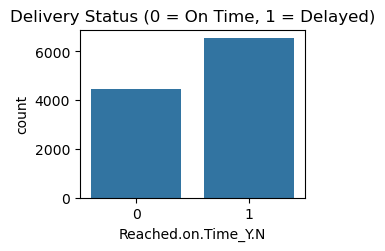

In [3]:
# 1. Delivery Status 
plt.subplot(2,2,1)
sns.countplot(x='Reached.on.Time_Y.N', data=df)
plt.title('Delivery Status (0 = On Time, 1 = Delayed)')

Text(0.5, 1.0, 'Mode of Shipment Distribution')

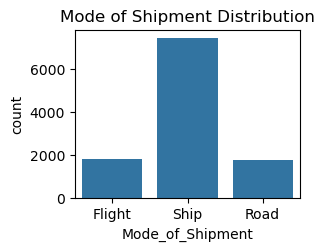

In [6]:
# 2. Mode of Shipment
plt.subplot(2,2,2)
sns.countplot(x='Mode_of_Shipment', data=df)
plt.title('Mode of Shipment Distribution')

Text(0.5, 1.0, 'Customer Rating Distribution')

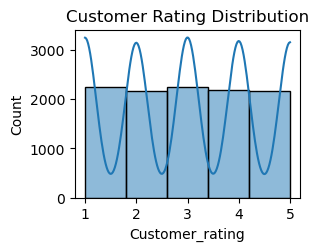

In [7]:
# 3. Customer Rating
plt.subplot(2,2,3)
sns.histplot(df['Customer_rating'], bins=5, kde=True)
plt.title('Customer Rating Distribution')

Text(0.5, 1.0, 'Product Importance Distribution')

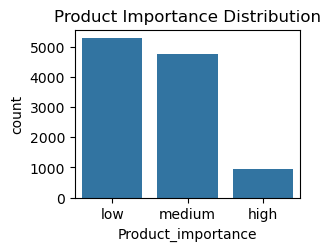

In [8]:
# 4. Product Importance
plt.subplot(2,2,4)
sns.countplot(x='Product_importance', data=df)
plt.title('Product Importance Distribution')

# Bivariate Analysis

## CATEGORICAL vs CATEGORICAL

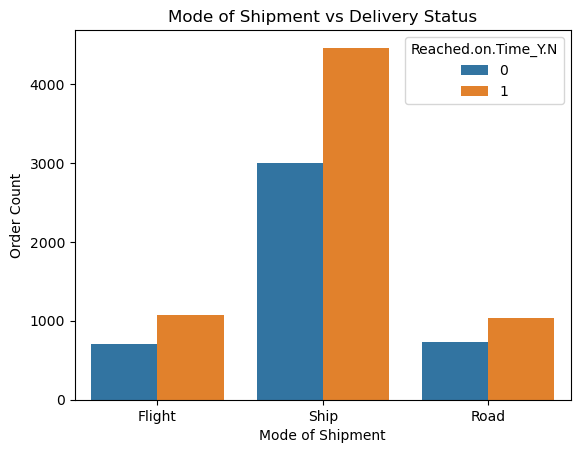

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(
    x='Mode_of_Shipment',
    hue='Reached.on.Time_Y.N',
    data=df
)
plt.title('Mode of Shipment vs Delivery Status')
plt.xlabel('Mode of Shipment')
plt.ylabel('Order Count')
plt.show()

## NUMERICAL vs NUMERICAL

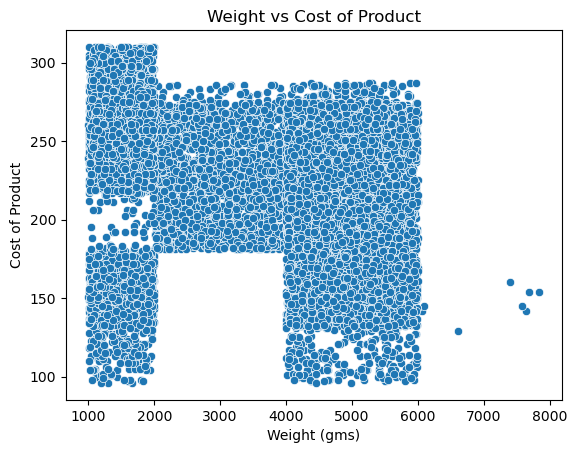

In [15]:
#num vs num
sns.scatterplot(
    x='Weight_in_gms',
    y='Cost_of_the_Product',
    data=df
)
plt.title('Weight vs Cost of Product')
plt.xlabel('Weight (gms)')
plt.ylabel('Cost of Product')
plt.show()

## CATEGORICAL vs NUMERICAL

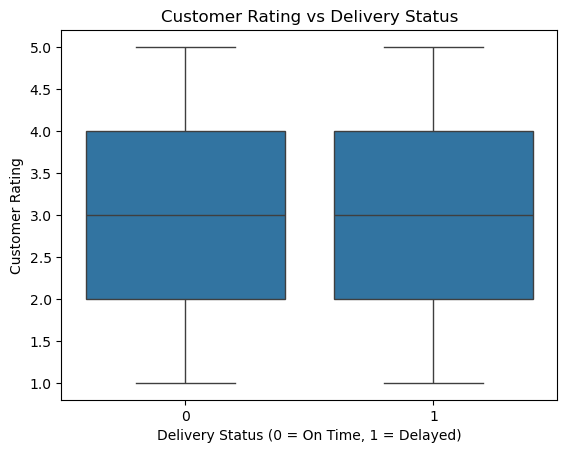

In [27]:
# cat vs num
sns.boxplot(
    x='Reached.on.Time_Y.N',
    y='Customer_rating',
    data=df
)
plt.title('Customer Rating vs Delivery Status')
plt.xlabel('Delivery Status (0 = On Time, 1 = Delayed)')
plt.ylabel('Customer Rating')
plt.show()

## Multivariate Analysis

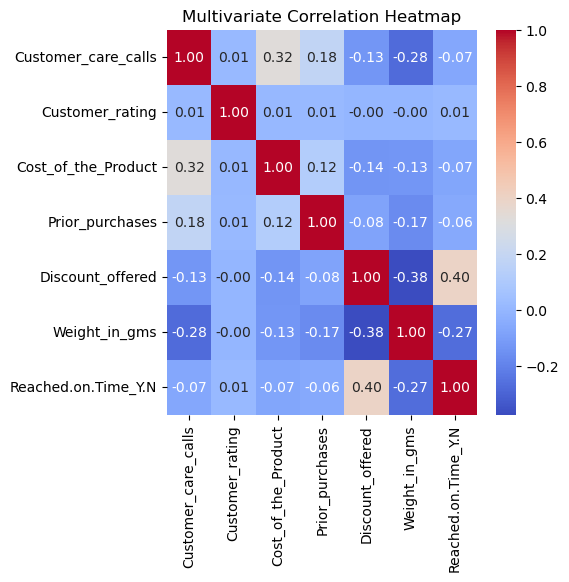

In [14]:

num_cols = [
    'Customer_care_calls',
    'Customer_rating',
    'Cost_of_the_Product',
    'Prior_purchases',
    'Discount_offered',
    'Weight_in_gms',
    'Reached.on.Time_Y.N'
]

# Correlation matrix
corr_matrix = df[num_cols].corr()

# Heatmap
plt.figure(figsize=(5,5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Multivariate Correlation Heatmap')
plt.show()

# Summary

##### The analysis shows that delivery performance in e-commerce is mainly influenced by shipment mode, product weight, and operational complexity. Heavier products and orders that require more customer support are more likely to be delayed, while faster shipment methods lead to better on-time delivery rates. When delays happen, the company often uses discounts to reduce customer dissatisfaction, but late deliveries still tend to lower customer ratings. Overall, the dataset is clean and well-structured, and the insights clearly highlight how logistics efficiency plays a key role in customer experience and business performance.